# PROYECTO FINAL - MODELOS 

La empresa GoGreen Bikesharing se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
#import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import sidetable as stb
import pylab as py

# Asunciones y Preprocesamiento
from scipy import stats
import math
from scipy.stats import levene
#import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp # chi square

#Linear Regresion con Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import cohen_kappa_score


# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
df_bike = pd.read_csv("./EDA__parte_3.csv", index_col=0)
df_bike.sample(6)

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
14,1248,222,1026,1,0,1,15,0,6,0,2,9.6,49.9,10.583521
196,5923,2418,3505,4,0,7,16,0,6,0,1,28.2,58.5,13.958914
210,4475,1559,2916,4,0,7,30,0,6,0,1,33.0,46.6,11.291979
608,6140,2352,3788,1,1,9,1,0,6,0,2,30.9,63.8,7.583529
181,5362,1246,4116,1,0,7,1,0,5,1,1,29.6,39.6,6.874736
619,7870,1050,6820,2,1,9,12,0,3,1,1,24.6,57.7,8.833682


---------

# REGRESION LOGISTICA

    Este dataframe tiene variable respuesta, y las predictoras encoding como tipo objets y numericas que sin encoding.

In [3]:
df= df_bike.copy() # Voy a hacer una copia para no perder los datos por si necesita hacer OPCION 1

In [4]:
df.head()

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,331,654,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,801,131,670,1,0,1,2,0,0,0,2,14.9,69.6,16.652113
2,1349,120,1229,1,0,1,3,0,1,1,1,8.1,43.7,16.636703
3,1562,108,1454,3,0,1,4,0,2,1,1,8.2,59.0,10.739832
4,1600,82,1518,3,0,1,5,0,3,1,1,9.3,43.7,12.522300


In [5]:
df.head(2)

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,331,654,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,801,131,670,1,0,1,2,0,0,0,2,14.9,69.6,16.652113


In [6]:
df.info() #Correcto tenemos que volver a cambiar el tipo de cada columna 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cnt              730 non-null    int64  
 1   casual           730 non-null    int64  
 2   registered       730 non-null    int64  
 3   season_encoding  730 non-null    int64  
 4   yr               730 non-null    int64  
 5   mnth             730 non-null    int64  
 6   day              730 non-null    int64  
 7   holiday          730 non-null    int64  
 8   weekday          730 non-null    int64  
 9   workingday       730 non-null    int64  
 10  weathersit       730 non-null    int64  
 11  temp             730 non-null    float64
 12  hum              730 non-null    float64
 13  windspeed        730 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 85.5 KB


In [7]:
df.columns

Index(['cnt', 'casual', 'registered', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

    Se ha cambiado las que tienen encoding a "category"

In [8]:
df['season_encoding'] = df['season_encoding'].astype('category')  
df['yr'] = df['yr'].astype('category')  
df['mnth'] = df['mnth'].astype('category')  
df['day'] = df['day'].astype('category')  
df['holiday'] = df['holiday'].astype('category')  
df['weekday'] = df['weekday'].astype('category')  
df['workingday'] = df['workingday'].astype('category')  
df['weathersit'] = df['weathersit'].astype('category')  

### Variables predictoras CATEGORICAS - GRAFICO

    Estas son nuestras variables categoricas

In [9]:
categoricas = df.select_dtypes(include='category')
categoricas.head(1)

,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit
0,1,0,1,1,0,6,0,2


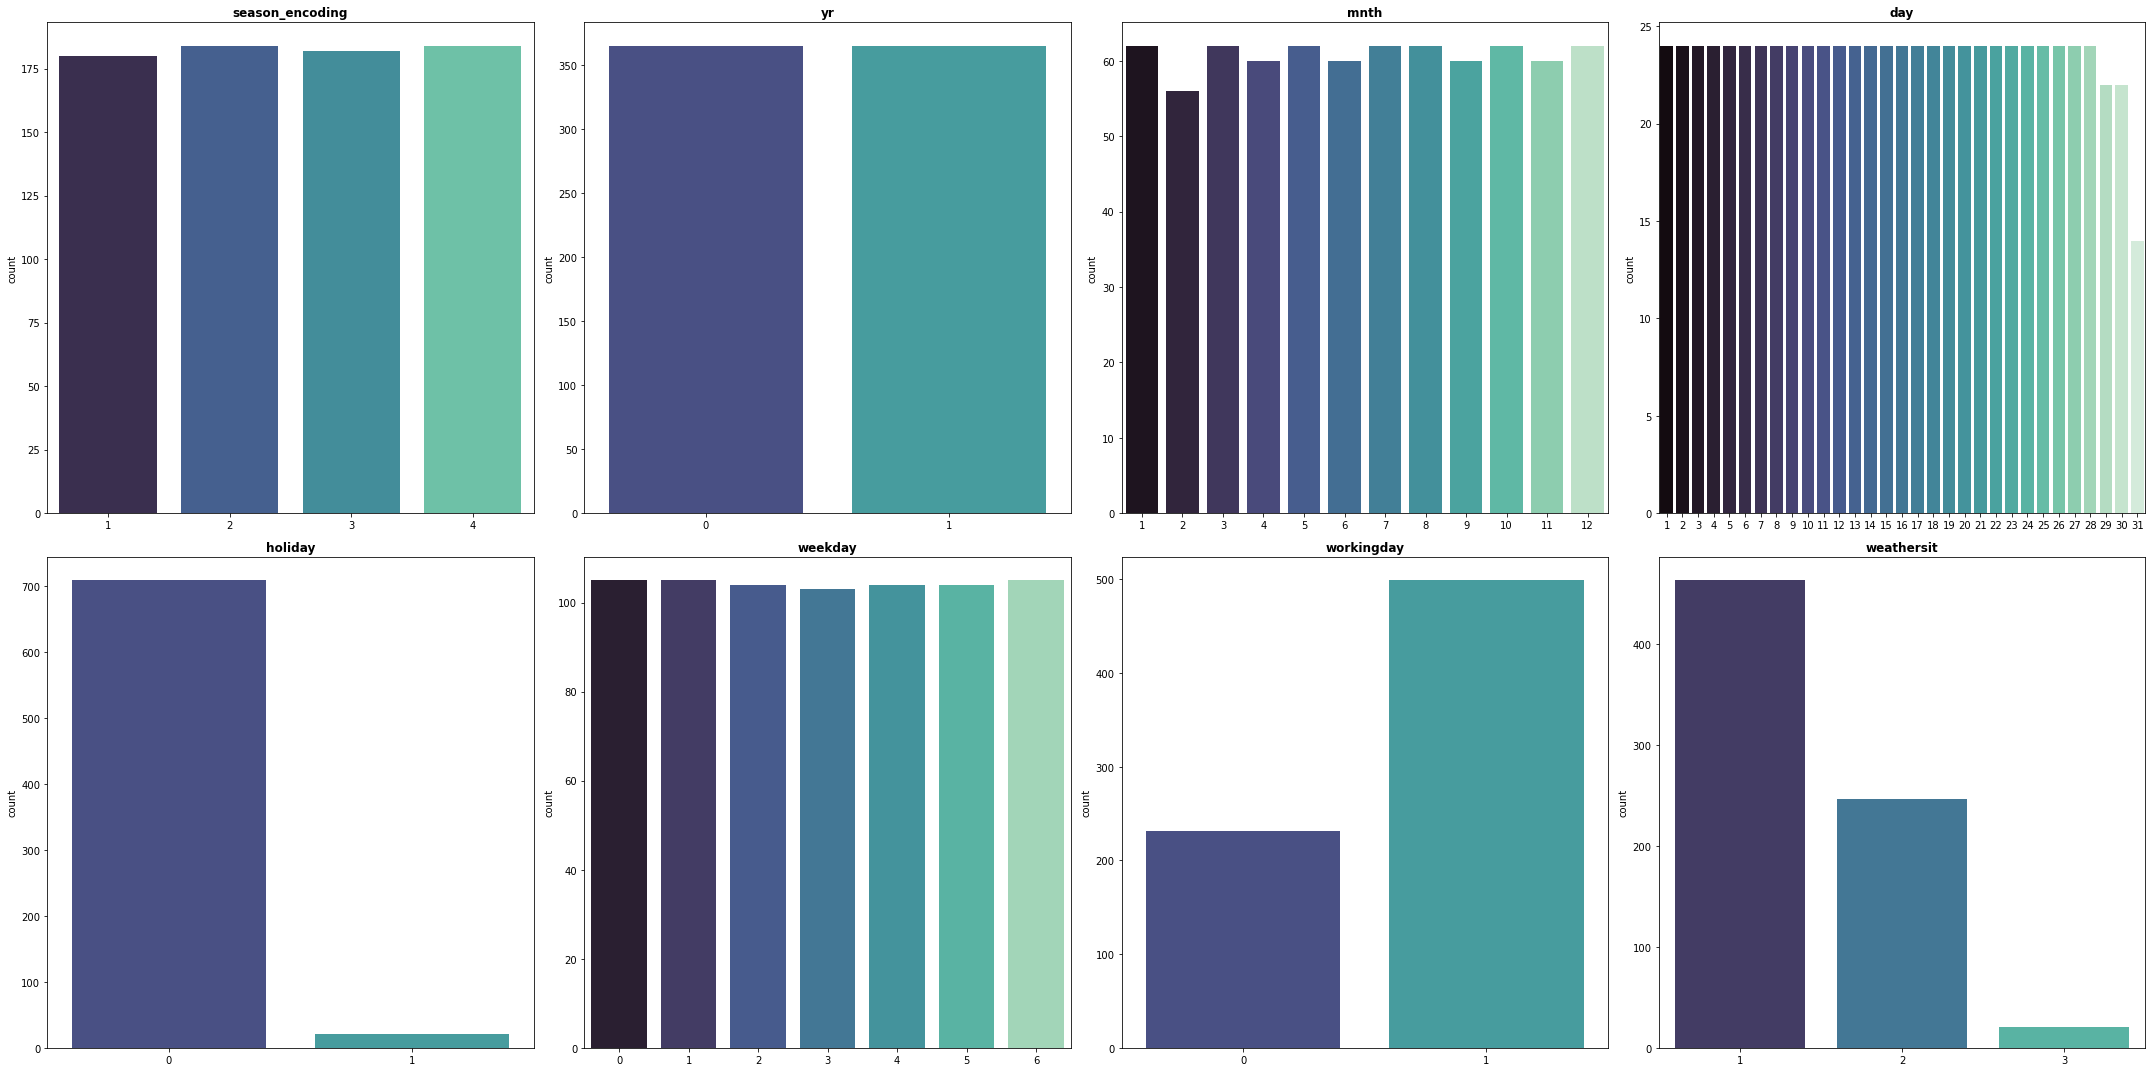

In [10]:
# Gráfico de relación entre variables predictoras y la variable a predecir CATEGORICAS
# ===================================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 15))

axes = axes.flat

columnas_object = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(df[colum], ax=axes[i], palette="mako")
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();



### Variables predictoras NUMERICAS - GRAFICO

    Estas son nuestras variables numéricas

In [11]:
numericas = df.select_dtypes(include = np.number)
numericas.head(1)

,cnt,casual,registered,temp,hum,windspeed
0,985,331,654,14.1,80.6,10.749882


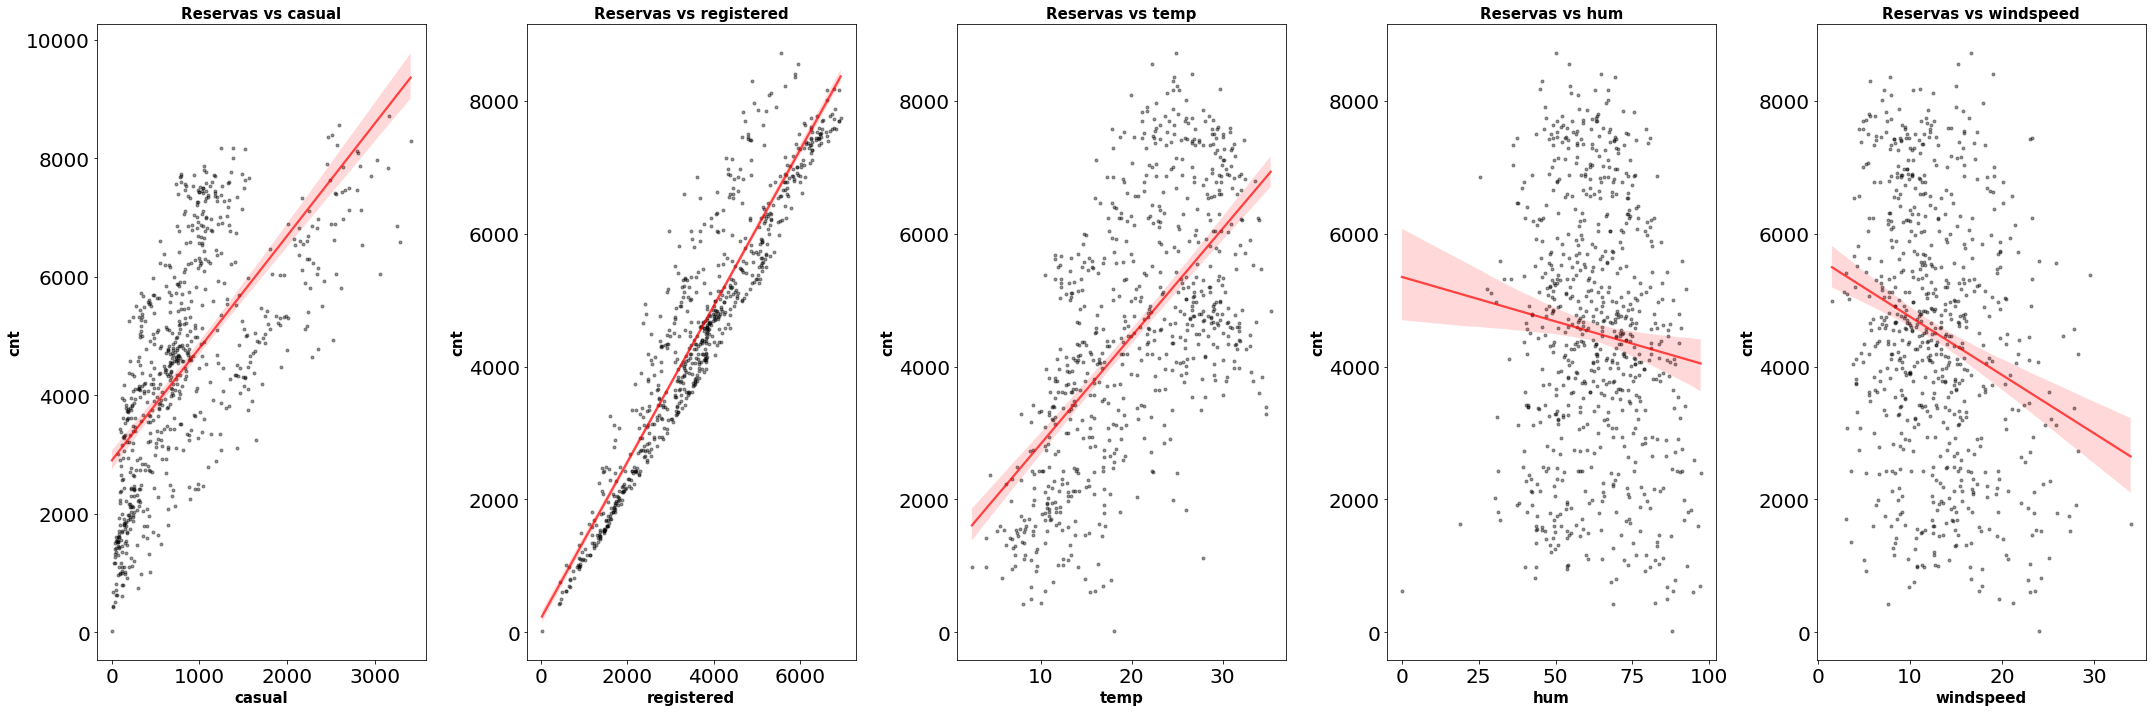

In [12]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("cnt") # excluimos nuestra variable respuesta. (No la necesitamos ahora

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["cnt"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Reservas vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum,  fontsize = 15, fontweight = "bold")
    axes[i].set_ylabel("cnt", fontsize = 15, fontweight = "bold")
    
fig.tight_layout();

### Vamos a comprobar la relación entre todas las variables

    CORRELACIÓN
        Vamos a ver la correlación entre las variables predictoras y que relación tienen tb con la respuesta.
        intervalo [-1 y 1]
	    r= 1 corr perfecta positiva (aumenta una , la otra tb aumenta)
	    r =0 no hay correlación
 	    r= -1 corr perfecta negativa (una aumenta y la otra disminuye)

    Correlación con respecto a la columna "cnt"

In [13]:
correlation = df.corr()['cnt'].abs().sort_values(ascending = False) #correlación solo te enseña numéricas, Pearson RESPECTO A LA COLUMNA "cnt"
correlation

cnt           1.000000
registered    0.945411
casual        0.672123
temp          0.627003
windspeed     0.235132
hum           0.098502
Name: cnt, dtype: float64

    Correlación entre todas las numéricas

In [14]:
numericas.corr() 

,cnt,casual,registered,temp,hum,windspeed
cnt,1.000000,0.672123,0.945411,0.627003,-0.098502,-0.235132
casual,0.672123,1.000000,0.394137,0.542824,-0.075259,-0.167995
registered,0.945411,0.394137,1.000000,0.539345,-0.089140,-0.217914
temp,0.627003,0.542824,0.539345,1.000000,0.128716,-0.158367
hum,-0.098502,-0.075259,-0.089140,0.128716,1.000000,-0.248582
windspeed,-0.235132,-0.167995,-0.217914,-0.158367,-0.248582,1.000000


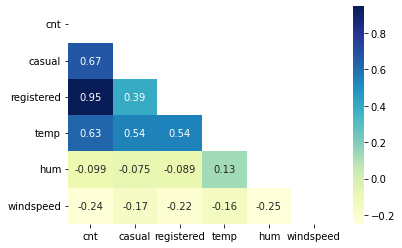

In [15]:
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool))
sns.heatmap(numericas.corr(), 
           cmap = "YlGnBu", 
           annot = True, 
           mask =mask);


In [16]:
numericas2 = df.select_dtypes(include = np.number).drop("cnt", axis = 1)

----

### Comprobar Outliers en este modelo

In [17]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [18]:
lista_columnas = list(numericas.columns)
lista_columnas

['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']

     Son pocos Outliers que no influyen en demasiado lo cambiamos por la mediana

In [19]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679], 'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}


In [20]:
for key, values in ind.items():
    median = df[key].median()
     
    if key == "hum" or key == 'windspeed':
        for i in values: 
            df.loc[i,key] = median
    else:
        pass

# Comprobación de las asunciones - Las variables predictoras deben cumplir: Homocedasteidad, Independencia 

    - Variables Categoricas -

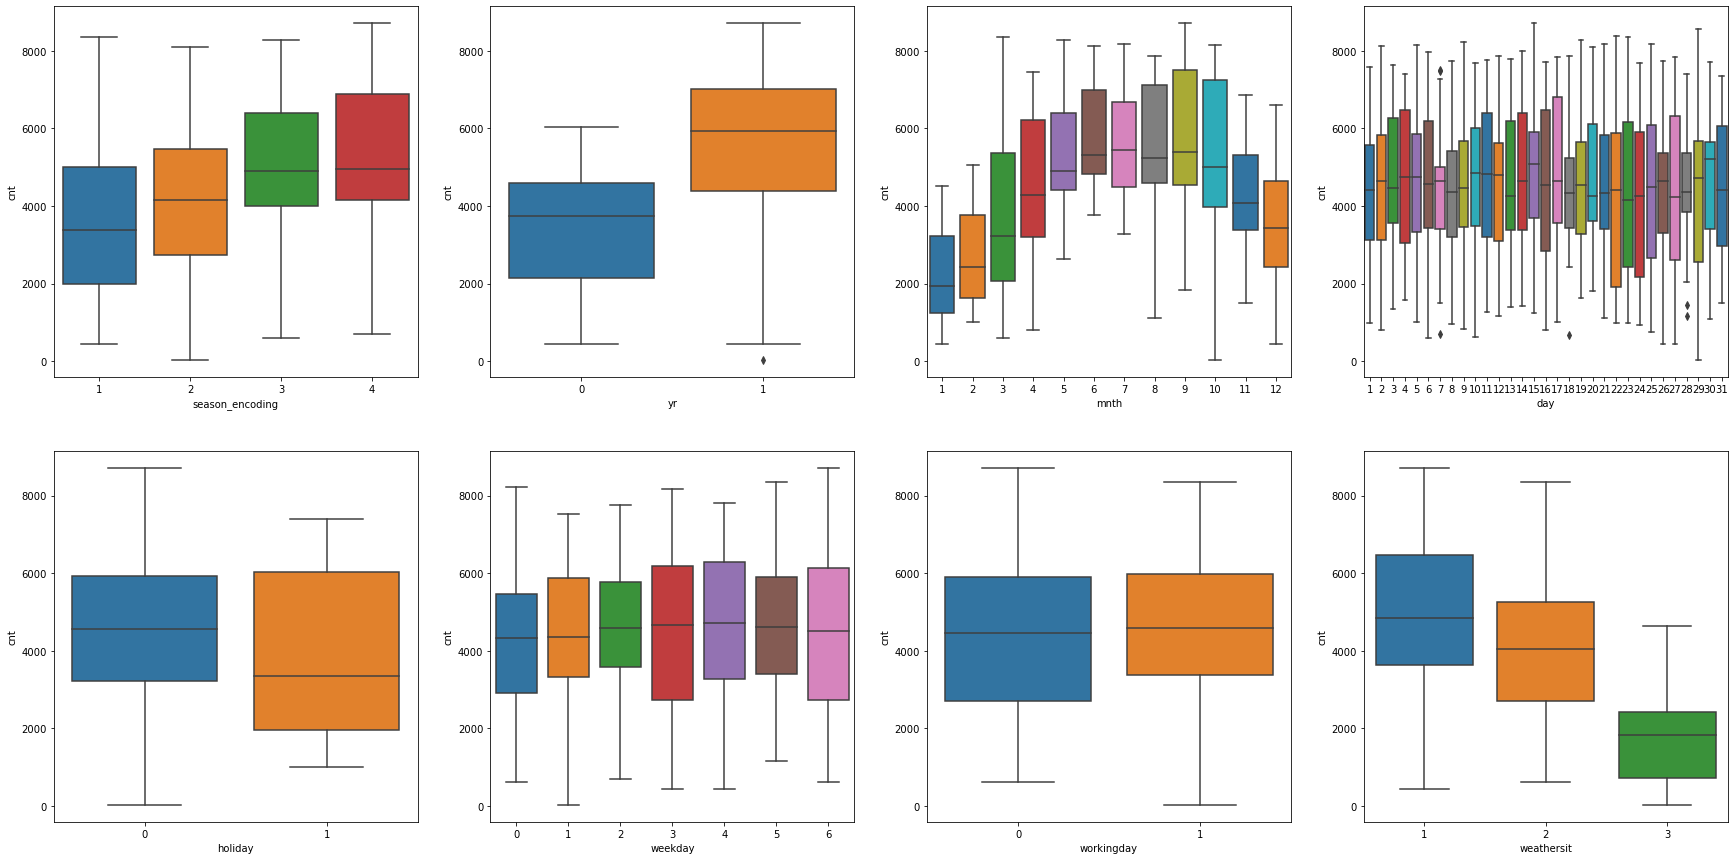

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 4 ,figsize = (30, 15))

axes = axes.flat

colum_cat = df.select_dtypes(include = ['category']).columns

for i, col in enumerate(colum_cat):
    sns.boxplot(
        x = col,
        y = 'cnt',
        data = df,
        palette = 'tab10',
        ax = axes[i]

    )

# ANOVA

    Ya podemos pasar a la ANOVA después de comprobar si las variables predictoras cumplen las asunciones

In [22]:
df.columns

Index(['cnt', 'casual', 'registered', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

    No añadimos "registered"

In [23]:
lm = ols('cnt ~  casual + season_encoding + yr + mnth + day + holiday + weekday + workingday + weathersit + temp + hum +  windspeed' , data=df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
season_encoding,3.0,2.965983e+08,9.886610e+07,262.807410,9.232468e-113
yr,1.0,8.869095e+08,8.869095e+08,2357.596632,8.943830e-222
mnth,11.0,7.803896e+08,7.094451e+07,188.585804,6.726230e-197
day,30.0,6.263900e+07,2.087967e+06,5.550266,3.255271e-18
holiday,1.0,8.356054e+06,8.356054e+06,22.212193,2.969398e-06
weekday,6.0,1.555021e+07,2.591702e+06,6.889303,4.102127e-07
workingday,1.0,4.369330e+04,4.369330e+04,0.116146,7.333591e-01
weathersit,2.0,1.746155e+08,8.730774e+07,232.082804,2.471926e-77
casual,1.0,2.342303e+08,2.342303e+08,622.634597,9.979754e-98
temp,1.0,1.246548e+07,1.246548e+07,33.135944,1.307773e-08


In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.36e-307
Time:                        18:17:47   Log-Likelihood:                -5690.9
No. Observations:                 730   AIC:                         1.150e+04
Df Residuals:                     671   BIC:                         1.177e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              356.6242    237.055      1.504      0.133    -108.835     822.084
season_encoding[T.2]  -863.7501    134.176     -6.437      0.000   -1127.206    -600.294
season_encoding[T.3]  -112.2496    132.729     -0.846      0.398    -372.864     148.365
season_encoding[T.4]   170.1781    135.956      1.252      0.211     -96.772     437.128
yr[T.1]               1618.6137     50.344     32.151      0.000    1519.764    1717.464
mnth[T.2]              167.1802    115.594      1.446      0.149     -59.789     394.150
mnth[T.3]              357.7042    124.355      2.876      0.004     113.532     601.877
mnth[T.4]              725.6083    162.872      4.455      0.000     405.808    1045.409
mnth[T.5]              965.1883    183.955      5.247      0.000     603.991    1326.385
mnth[T.6]              984.5038    206.093      4.777      0.000     579.838    1389.169
mnth[T.7]              475.4431    238.019      1.998      0.046       8.091     942.795
mnth[T.8]              763.8200    224.378      3.404      0.001     323.253    1204.387
mnth[T.9]             1328.8584    201.801      6.585      0.000     932.620    1725.097
mnth[T.10]            2000.1314    171.104     11.690      0.000    1664.168    2336.095
mnth[T.11]            1695.6418    150.259     11.285      0.000    1400.608    1990.676
mnth[T.12]            1394.2986    144.184      9.670      0.000    1111.193    1677.405
day[T.2]                74.7387    177.810      0.420      0.674    -274.393     423.870
day[T.3]                93.2341    178.114      0.523      0.601    -256.495     442.963
day[T.4]               199.8793    223.082      0.896      0.371    -238.143     637.902
day[T.5]               230.2166    222.135      1.036      0.300    -205.947     666.380
day[T.6]               264.3795    222.928      1.186      0.236    -173.341     702.100
day[T.7]              -187.9049    224.193     -0.838      0.402    -628.108     252.299
day[T.8]              -150.6411    223.709     -0.673      0.501    -589.896     288.614
day[T.9]              -108.5017    223.168     -0.486      0.627    -546.693     329.690
day[T.10]             1045.1206    223.163      4.683      0.000     606.938    1483.303
day[T.11]             1117.8522    222.726      5.019      0.000     680.528    1555.176
day[T.12]             1054.7443    223.202      4.726      0.000     616.485    1493.003
day[T.13]              304.5042    196.799      1.547      0.122     -81.911     690.919
day[T.14]              268.5003    196.151      1.369      0.172    -116.644     653.645
day[T.15]              442.4931    196.707      2.250      0.025      56.258     828.728
day[T.16]              495.4151    196.838      2.517      0.012     108.922     881.908
day[T.17]              498.9497    197.102      2.531    

# VIF - Para comprobar si hay o no multicolinealidad (Correlación alta entre dos v. predictoras), podemos averiguar si eliminar o no ésta variable.

Vif = 1 No existe corr entre una variable predictora y el resto

Vif = 1-5 Correlación moderada

Vif= +5 Correlación severa (Puede que se deba eliminar esa variable)

In [25]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [26]:
get_VIF(df,'cnt')

const              57.356721
registered          5.250707
casual              3.499982
workingday          3.049152
temp                2.692000
yr                  2.505302
hum                 2.022413
weathersit          1.999211
mnth                1.344211
season_encoding     1.326242
windspeed           1.177274
holiday             1.099122
weekday             1.041472
day                 1.019574
dtype: float64

In [27]:
get_VIF(df.drop(columns=['registered','casual']),'cnt')

const              52.810975
hum                 1.999244
weathersit          1.859346
temp                1.377595
season_encoding     1.322259
mnth                1.137880
windspeed           1.134465
holiday             1.083125
workingday          1.076342
yr                  1.027614
weekday             1.019686
day                 1.011929
dtype: float64

In [38]:
df.to_csv("knn.csv")

--------

# Regresion Logistica

In [28]:
df_standardized = df.copy()

In [29]:
numericas2 = df_standardized.select_dtypes(include = np.number)

In [30]:
st = MinMaxScaler()
x_tranformadas = pd.DataFrame(st.fit_transform(numericas2))
x_tranformadas.columns = numericas2.columns
df[x_tranformadas.columns] = x_tranformadas
df.head()

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,0.110792,0.096538,0.091539,1,0,1,1,0,6,0,2,0.355623,0.768802,0.388102
1,0.089623,0.037852,0.093849,1,0,1,2,0,0,0,2,0.379939,0.615599,0.635752
2,0.152669,0.034624,0.174560,1,0,1,3,0,1,1,1,0.173252,0.254875,0.635105
3,0.177174,0.031103,0.207046,3,0,1,4,0,2,1,1,0.176292,0.467967,0.387681
4,0.181546,0.023474,0.216286,3,0,1,5,0,3,1,1,0.209726,0.254875,0.462471


In [31]:
x = df_standardized.drop(['cnt','registered','casual'] ,axis =1)
y = df_standardized['cnt']

In [32]:
x.shape , y.shape

((730, 11), (730,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size   = 0.2, random_state = 666)

In [46]:
y_train.describe()

count     146.000000
mean     4341.520548
std      1924.835958
min       627.000000
25%      2825.250000
50%      4284.000000
75%      5687.500000
max      8362.000000
Name: cnt, dtype: float64

In [47]:

y_test.describe().T

count     584.000000
mean     4549.628425
std      1938.201466
min        22.000000
25%      3247.500000
50%      4615.500000
75%      6001.750000
max      8714.000000
Name: cnt, dtype: float64

...

# Regresión Logistica

...

EJEMPLO 1

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

EJEMPLO 2

In [48]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [49]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [50]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)

    df = pd.DataFrame(mat_lr, columns = ["Mas reservas", "Menos reservas"], index = ["Mas reservas", "Menos reservas"])
    df = ((df / total_filas_test) * 100).round(2)
    return df


In [ ]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr_test)
accuracy

In [ ]:
precision = precision_score(y_test, y_pred_lr_test)
precision

In [ ]:
recall = recall_score(y_test, y_pred_lr_test)
recall

In [ ]:
kappa = cohen_kappa_score(y_test, y_pred_lr_test)
kappa

In [ ]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [ ]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

# KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

# Random Forest

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

# Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

...